In [ ]:
import tensorflow as tf

In [ ]:
#GPU를 사용하도록 설정
tf.debugging.set_log_device_placement(True)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
#텐서플로의 객체 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
from matplotlib import pyplot as plt

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', tf.keras.__version__)

Python version :  3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version :  2.4.1
Keras version :  2.4.0


In [ ]:
import numpy as np

In [ ]:
이미지_높이 = 448
이미지_너비 = 304

In [ ]:
#0으로 초기화된 배열 생성
# 448 * 304 * 4
학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 4), dtype = np.uint8)

In [ ]:
학습이미지_하나

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
학습이미지_하나.shape

(448, 304, 4)

In [ ]:
import cv2

In [ ]:
#197811.
npy_file="197811.npy"

npy_data = np.load(npy_file)
#0번째 이미지를 해빙농도 변수에 저장
해빙농도 = npy_data[: , : , 0]
#1번째 이미지 북극점 변수에 저장
북극점 = npy_data[: , : , 1]

#2번째 이미지 해안선 마스크 변수에 저장
해안선마스크 = npy_data[: , : , 2]
#3번째 이미지 육지마스크에 대입
육지마스크 = npy_data[: , : , 3]
#해빙농도, 북극점, 해안선마스크, 육지마스크를 하나로 병합
학습이미지_하나 = cv2.merge((해빙농도, 북극점, 해안선마스크, 육지마스크))


In [ ]:
학습이미지_하나

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       ...,

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
학습이미지_하나.shape

(448, 304, 4)

In [ ]:
import glob

targetPattern = "*.npy"
#현재 폴더에서 확장자가 npy인 파일 리스트 리턴
npy_file_name_list = glob.glob(targetPattern)

npy_file_name_list

['201106.npy',
 '198011.npy',
 '200708.npy',
 '199612.npy',
 '200103.npy',
 '201703.npy',
 '198107.npy',
 '201403.npy',
 '199208.npy',
 '199908.npy',
 '199008.npy',
 '201505.npy',
 '200007.npy',
 '200409.npy',
 '199506.npy',
 '198911.npy',
 '201610.npy',
 '199108.npy',
 '199802.npy',
 '200501.npy',
 '198305.npy',
 '200905.npy',
 '200001.npy',
 '197910.npy',
 '198001.npy',
 '201707.npy',
 '201305.npy',
 '200605.npy',
 '200102.npy',
 '200402.npy',
 '199203.npy',
 '201105.npy',
 '197907.npy',
 '200904.npy',
 '200304.npy',
 '199607.npy',
 '198006.npy',
 '199811.npy',
 '198412.npy',
 '201406.npy',
 '201303.npy',
 '199909.npy',
 '200312.npy',
 '199707.npy',
 '198109.npy',
 '199010.npy',
 '199611.npy',
 '199310.npy',
 '200002.npy',
 '200109.npy',
 '201710.npy',
 '198604.npy',
 '201409.npy',
 '200711.npy',
 '201110.npy',
 '199904.npy',
 '201812.npy',
 '198608.npy',
 '198901.npy',
 '199604.npy',
 '201304.npy',
 '199212.npy',
 '198710.npy',
 '198908.npy',
 '199404.npy',
 '198303.npy',
 '200606.n

In [ ]:
#확장자가 npy인 파일 리스트를 오름차순 정렬
npy_file_name_list.sort()

In [ ]:
npy_file_name_list

['197811.npy',
 '197812.npy',
 '197901.npy',
 '197902.npy',
 '197903.npy',
 '197904.npy',
 '197905.npy',
 '197906.npy',
 '197907.npy',
 '197908.npy',
 '197909.npy',
 '197910.npy',
 '197911.npy',
 '197912.npy',
 '198001.npy',
 '198002.npy',
 '198003.npy',
 '198004.npy',
 '198005.npy',
 '198006.npy',
 '198007.npy',
 '198008.npy',
 '198009.npy',
 '198010.npy',
 '198011.npy',
 '198012.npy',
 '198101.npy',
 '198102.npy',
 '198103.npy',
 '198104.npy',
 '198105.npy',
 '198106.npy',
 '198107.npy',
 '198108.npy',
 '198109.npy',
 '198110.npy',
 '198111.npy',
 '198112.npy',
 '198201.npy',
 '198202.npy',
 '198203.npy',
 '198204.npy',
 '198205.npy',
 '198206.npy',
 '198207.npy',
 '198208.npy',
 '198209.npy',
 '198210.npy',
 '198211.npy',
 '198212.npy',
 '198301.npy',
 '198302.npy',
 '198303.npy',
 '198304.npy',
 '198305.npy',
 '198306.npy',
 '198307.npy',
 '198308.npy',
 '198309.npy',
 '198310.npy',
 '198311.npy',
 '198312.npy',
 '198401.npy',
 '198402.npy',
 '198403.npy',
 '198404.npy',
 '198405.n

In [ ]:
#전체 학습 이미지가 저장될 리스트
전체_학습이미지_리스트 = []

#npy_file_name_list 에서 파일명 하나를 npy_file에 대입
for npy_file in npy_file_name_list:
  print("npy_file = ", npy_file)
  npy_data = np.load(npy_file)
  #0번째 이미지를 해빙농도 변수에 저장
  해빙농도 = npy_data[: , : , 0]
  #1번째 이미지 북극점 변수에 저장
  북극점 = npy_data[: , : , 1]
  북극점_포함_해빙농도 = 해빙농도+북극점
  #2번째 이미지 해안선 마스크 변수에 저장
  해안선마스크 = npy_data[: , : , 2]
  #3번째 이미지 육지마스크에 대입
  육지마스크 = npy_data[: , : , 3]
  학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 3), dtype = np.uint8)
  #해빙농도, 북극점, 해안마스크, 육지마스크를 하나로 병합
  학습이미지_하나 = cv2.merge((해빙농도, 북극점_포함_해빙농도, 해안선마스크, 육지마스크))
  #학습이미지_하나를 전체_학습이미지_리스트에 추가
  전체_학습이미지_리스트.append(학습이미지_하나)
  print("="*100)

npy_file =  197811.npy
npy_file =  197812.npy
npy_file =  197901.npy
npy_file =  197902.npy
npy_file =  197903.npy
npy_file =  197904.npy
npy_file =  197905.npy
npy_file =  197906.npy
npy_file =  197907.npy
npy_file =  197908.npy
npy_file =  197909.npy
npy_file =  197910.npy
npy_file =  197911.npy
npy_file =  197912.npy
npy_file =  198001.npy
npy_file =  198002.npy
npy_file =  198003.npy
npy_file =  198004.npy
npy_file =  198005.npy
npy_file =  198006.npy
npy_file =  198007.npy
npy_file =  198008.npy
npy_file =  198009.npy
npy_file =  198010.npy
npy_file =  198011.npy
npy_file =  198012.npy
npy_file =  198101.npy
npy_file =  198102.npy
npy_file =  198103.npy
npy_file =  198104.npy
npy_file =  198105.npy
npy_file =  198106.npy
npy_file =  198107.npy
npy_file =  198108.npy
npy_file =  198109.npy
npy_file =  198110.npy
npy_file =  198111.npy
npy_file =  198112.npy
npy_file =  198201.npy
npy_file =  198202.npy
npy_file =  198203.npy
npy_file =  198204.npy
npy_file =  198205.npy
npy_file = 

In [ ]:
전체_학습이미지_리스트

[array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        ...,
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8), array([[[0, 0, 0, 0],
         [0, 0, 0, 0

In [ ]:
#전체_학습이미지_리스트를 배열로 변환
전체_학습이미지_배열 = np.array ( 전체_학습이미지_리스트)

In [ ]:
전체_학습이미지_배열

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        ...,

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [ ]:
전체_학습이미지_배열.shape

(482, 448, 304, 4)

In [ ]:
X_train_list = []
y_train_list = []
#첫번째 이미지부터 마지막 24개의 이미지(2016년 1월 ~ 2018년 12월)를 제외한 이미지 
for i in range(482-48):
  #i번째 이미지 1개(북극점포함_해빙농도, 해안마스크, 육지마스크를 하나로 병합 ) 를 X_train_list에 추가
  X_train_list.append( 전체_학습이미지_배열[i, : , : , 1:] )
  #i+12 번째 이미지  (1년후) 의 0번째 데이터 (해빙농도)를 y_train_list에 추가
  y_train_list.append( 전체_학습이미지_배열[i+24, : , : , 0] )

In [ ]:
#X_train_list (북극점포함_해빙농도, 해안마스크, 육지마스크) 을 배열로 변환
X_train = np.array(X_train_list)
#y_train_list (해빙농도) 를 배열로 변환
y_train = np.array(y_train_list)

In [ ]:
#X_train의 모양 조회
# 448줄 304칸 짜리 3개 이미지 조합이 458개
X_train.shape

(434, 448, 304, 3)

In [ ]:
#y_train 모양 조회
#448줄 304칸 의 배열 (해빙농도) 가 458개
y_train.shape

(434, 448, 304)

In [ ]:
#y_train.reshape(-1, 448*304 ) : 448줄 304칸의 데이터를 1줄 448*304 칸으로 변환 
y_train = y_train.reshape(-1, 448*304 )

In [ ]:
y_train.shape

(434, 136192)

In [ ]:
X_test_list = []
y_test_list = []
#전체 학습이미지 482개중 
#482-24 (2017년 1월) 부터 482-12 (2017년 12월) 까지 반복
for i in range(482-48,482-24):
  #i번째 이미지 1개(북극점포함_해빙농도, 해안마스크, 육지마스크를 하나로 병합 ) 를 X_test_list에 추가
  X_test_list.append( 전체_학습이미지_배열[i, : , : , 1:] )
  #i+12 번째 이미지 (해빙농도) 를 y_test_list에 추가
  y_test_list.append( 전체_학습이미지_배열[i+24, : , : , 0] )


In [ ]:
#X_test_list를 배열로 변환
X_test = np.array(X_test_list)

In [ ]:
#X_test의 모양 조회
#448줄 304칸 이미지 3개 조합(북극점 포함 해빙농도, 해안마스크,육지마스크)이 12개
X_test.shape

(24, 448, 304, 3)

In [ ]:
#y_test_list를 배열로 변환
y_test = np.array(y_test_list)

In [ ]:
#y_test 의 모양 조회
#448줄 304칸 이미지 (해빈농도) 12개
y_test.shape

(24, 448, 304)

In [ ]:
#y_test.reshape(-1, 448*304) : 448칸 304줄의 데이터를 1칸 448*304칸으로 수정
y_test = y_test.reshape(-1, 448*304)

In [ ]:
y_test.shape

(24, 136192)

In [ ]:
#한번에 이미지 2개씩 학습
#한번에 많은 이미지씩 학습하면 학습속도도 빠르고 정확도도 높으나 메모리가 많이 필요함

batch_size = 2
#결과 칸수
num_classes = 448*304
#학습데이터에 저장된 458개 이미지를 300번 반복해서 학습
epochs = 180

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

#Resnet152 구조를 갖는 Model생성
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(이미지_높이, 이미지_너비, 3))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
E

In [ ]:
conv_layers.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 304, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 304, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 304, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 152, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 152, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 152, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 76, 128)      0     

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# inputs = keras.Input(shape=(이미지_높이, 이미지_너비, 3))
# x = inputs
# #x = layers.MaxPooling2D(2)(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Dropout(0.25)(x)
# x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128)(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64)(x)
# x = layers.Dense(num_classes, activation='relu')(x)
# outputs = x

# model = keras.Model(inputs, outputs)
# model.summary()

In [ ]:
#입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()
#Resnet152 대입
model.add(conv_layers)
#선형 회귀를 하기 위해서 합성곱 연산을 수행한 결과를 1차원 배열로 변환
model.add(Flatten())
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 y_h1이고 칸의 수는 1024 이므로
#Dense(1024)  
# activation="relu" :선형 회귀 후 relu 활성 함수 사용
#model.add(Dense(1024, activation='relu')) :Dense 모델을 예측 할 수 있도록 model에 추가
model.add(Dense(1024, activation='relu'))
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 y_h2이고 칸의 수는 512 이므로
#Dense(512)  
# activation="relu" :선형 회귀 후 relu 활성 함수 사용
#model.add(Dense(512, activation='relu')) :Dense 모델을 예측 할 수 있도록 model에 추가
model.add(Dense(512, activation='relu'))
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='relu'))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [ ]:
'''model = Sequential()
model.add(Conv2D(256, kernel_size=(5, 5), strides=(5, 5), padding='same',
                 activation='relu',
                 input_shape=(이미지_높이, 이미지_너비, 3)))

model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='relu'))'''

"model = Sequential()\nmodel.add(Conv2D(256, kernel_size=(5, 5), strides=(5, 5), padding='same',\n                 activation='relu',\n                 input_shape=(이미지_높이, 이미지_너비, 3)))\n\nmodel.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))\nmodel.add(Conv2D(256, (5, 5), activation='relu', padding='same'))\nmodel.add(MaxPooling2D(pool_size=(5, 5)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes, activation='relu'))"

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 14, 9, 512)        14714688  
_________________________________________________________________
flatten (Flatten)            (None, 64512)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              66061312  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 136192)            6

In [ ]:
'''from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))'''

"from IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\n%matplotlib inline\n\nSVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))"

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#Mean Squared Error 를 계산해서 오차가최소화 되는 모델을 만들꺼임
model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=1e-4), 
              metrics=[tf.keras.metrics.MeanSquaredError()]
              )


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhos

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
217/217 [==============================] - 28s 130ms/step - loss: 270.1928 - mean_squared_error: 270.1928
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 159/180
Executing op __inference_train_function_1887 in device /job:localhost/replica:0/task:0/device:GPU:0
217/217 [==============================] - 28s 130ms/step - loss: 263.0126 - mean_squared_error: 263.0126
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /jo

In [ ]:
#X_test : 2017년 1월~12월 북극점포함해빙농도,해안마스크, 육지마스크

#model.predic () : 1년후 해빙농도를 예측함
#=>2017년 1월의 북극점포함해빙농도,해안마스크,육지마스크 입력하면
#2018년 1월의 해빙농도 예측

#X_test에 2017년 1월~12월 북극점포함해빙농도,해안마스크, 육지마스크 가 저장되 있으므로
#model.predict()는 2018년 1월~12월 해빙농도를 예측해서 y_predict에 저장
y_predict = model.predict(X_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [ ]:
#2018년 1월~12월 해빙농도
y_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#2018년 1월 진짜 해빙농도
y_test[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
#1줄 448*304칸의 2018년 1월 예측 해빙이미지(y_predict[0])를 448줄 304칸으로 변환해서
#예측0_이미지에 대입
예측0_이미지 = y_predict[0].reshape(448, 304)

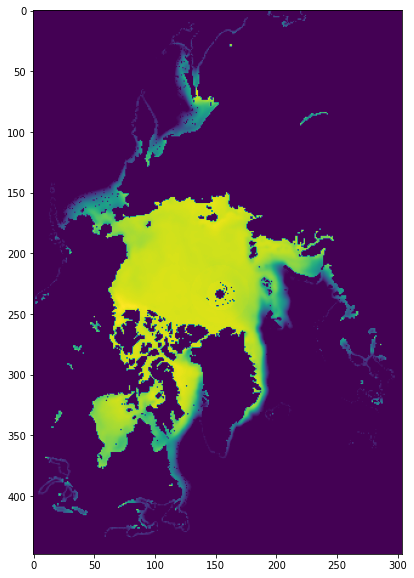

In [ ]:
#2018년 1월 예측한 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(예측0_이미지)

In [ ]:
#1줄 448*304칸 2018년 1월 진짜 해빙이미지 (y_test[0]) 를 448줄 304칸으로
#변환해서 진짜0_이미지 에 저장
진짜0_이미지 = y_test[0].reshape(448, 304)

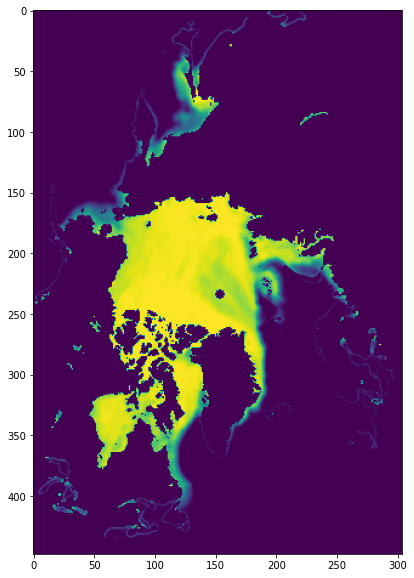

In [ ]:
#2018년 1월 진짜 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(진짜0_이미지)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Mean Squared Error
mean_squared_error(y_test, y_predict)

261.13962

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mean Absolute Error
mean_absolute_error(y_test, y_predict)

4.618207

In [ ]:
import pandas as pd

In [ ]:
index_value = []
for i in range(2019,2021):
    for j in range(1,13):
        if j <10:
            index_value.append("%d-0%d"%(i,j))
        else:
            index_value.append("%d-%d"%(i,j))

In [ ]:
df = pd.DataFrame(y_predict,index=index_value ,columns=[x for x in range(136192)] ) 

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.rename(columns={"index":"month"}, inplace=True)

In [ ]:
df

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv('submission_0325_vggnet.csv')

In [ ]:
res = pd.read_csv('sample_submission.csv')

In [ ]:
res

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2019-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2019-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2019-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2019-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
